# Accessing Instances

## Ready to connect!

(opens in a new tab)John is ready to try connecting to his Amazon EC2 instances. He has a Windows laptop and a Linux laptop and is finding the documentation necessary to help him access his instances from both operating systems. He's realized that there are different connection methods based on his laptop OS. Let's see what his research has found for connecting to EC2 instances from the different client OS types.

## Different connection options

(opens in a new tab)There are a variety of instance connection options from within the AWS Management Console and from a client-side machine. For client-side connections, the tool you use to connect to the instance depends both on what the instance OS is and which operating system you are running on your local client machine. AWS provides guidance and documentation for deploying, connecting, and operating both Linux-based and Windows-based instances.

### Connecting to a Linux instance
–
First, you will need to gather information about your instance.

- Get the ID of the instance. You can get the ID of your instance using the Amazon EC2 console (from the Instance ID column). 

- Get the public DNS name of the instance. You can get the public DNS for your instance using the Amazon EC2 console. Check the Public IPv4 DNS column.

- (IPv6 only) Get the IPv6 address of the instance. If you've assigned an IPv6 address to your instance, you can optionally connect to the instance using its IPv6 address instead of a public IPv4 address or public IPv4 DNS hostname. 

- Get the user name for your instance. You can connect to your instance using the user name for your user account or the default user name for the AMI that you used to launch your instance.

### Connecting to a Windows instance
–
Prerequisites

- Install the appropriate Remote Desktop Protocol (RDP) client for the OS on your local machine.

    - (Windows OS) Windows includes an RDP client by default. To verify, type mstsc at a command prompt window. If your computer doesn't recognize this command, see the Windows home page and search for the download for the Microsoft Remote Desktop app.

    - (Mac OS X) Download the Microsoft Remote Desktop app from the Mac App Store.

    - (Linux) Use Remmina.

- Locate the private key. Get the fully qualified path to the location on your computer of the .pem file for the key pair that you specified when you launched the instance.

- Enable inbound RDP traffic from your IP address to your instance. Ensure that the security group associated with your instance allows incoming RDP traffic (port 3389) from your IP address. The default security group does not allow incoming RDP traffic by default. 

- To connect to a Windows instance, you must retrieve the initial administrator password and then enter this password when you connect to your instance using Remote Desktop. It takes a few minutes after instance launch before this password is available. The name of the administrator account depends on the language of the OS. For example, for English, it's Administrator, for French it's Administrateur, and for Portuguese it's Administrador.

## Using SSH

Secure Shell (SSH) is a network protocol that faciliatates a secure, encrypted connection between two systems—an SSH client and an SSH server. When connected to the server, the client can remotely perform all operations as if they were standing in front of the server.

SSH authentication to an EC2 instance is done through the use of the key pair you associated with the instance when you launched it. The key pairs, a public and a private key, are a form of asymmetric cryptography used to authenticate the client and server to each other. This key pair makes it possible to secure, connect, and manage the instance, which is why it is very important to not lose your key pair.

## SSH tools

SSH is a native tool built into Unix-based systems (Linux and MacOS). For newer versions of the Windows OS, a version of OpenSSH comes preinstalled. Additionally, there are a variety of SSH tools that can be downloaded and installed; for example, PuTTY, WinSCP, and xShell. There are many choices and you can search for several different SSH clients and their features to see which is the right tool for you.

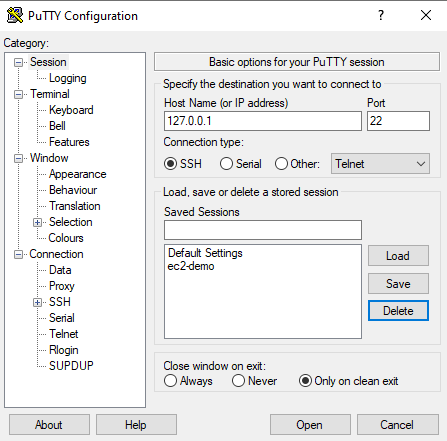

## Controlling access to your instance

The security group controls the traffic into the instance itself. When you launch an instance, you assign it one or more security groups. You can add multiple rules within each security group to control traffic allowed into or out of the instance. By default, all traffic is allowed out of the instance and you must create inbound rules if you want any traffic allowed inbound. You can modify the rules for a security group at any time. The new rules are automatically applied to all instances to which the security group is assigned.

If you are using SSH to connect to your instance, you must ensure that port 22 is configured as an inbound security group rule. If you're trying to use SSH and do not add a security group rule for port 22, you will receive connection errors when attempting to connect by SSH to your instance. 

The following image shows the inbound rules for a security group in the EC2 Dashboard. This inbound rule has a Type indicating SSH and the Port range of 22 open. For security reasons, this inbound rule only allows one IP address to connect and manage this instance. By not leaving SSH open to all IP addresses, you eliminate the potential of unauthorized users trying to connect to your instance.

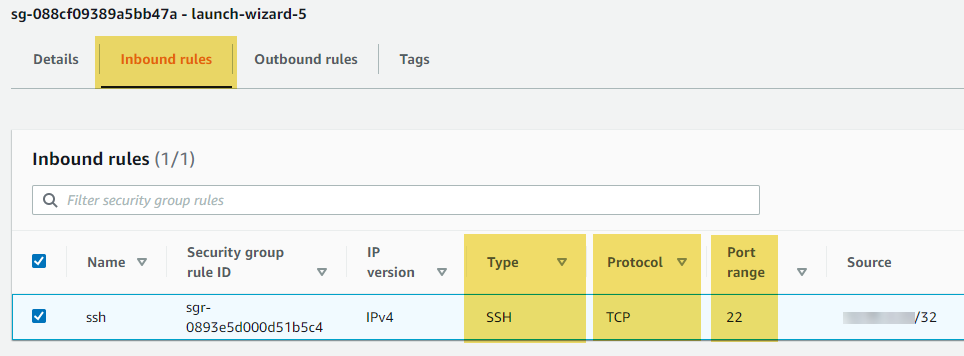



## Amazon EC2 Instance Connect

Another connection option is Amazon EC2 Instance Connect. EC2 Instance Connect provides a secure way to connect to your Linux instances using SSH. You use AWS Identity and Access Management (IAM) policies and principals to control SSH access to your instances. EC2 Instance Connect removes the need to share and manage SSH key pairs. All connection requests using EC2 Instance Connect are logged to AWS CloudTrail so that you can audit connection requests.

You can use EC2 Instance Connect to connect to your instances using the Amazon EC2 console (browser-based client), the Amazon EC2 Instance Connect CLI, or the SSH client of your choice.

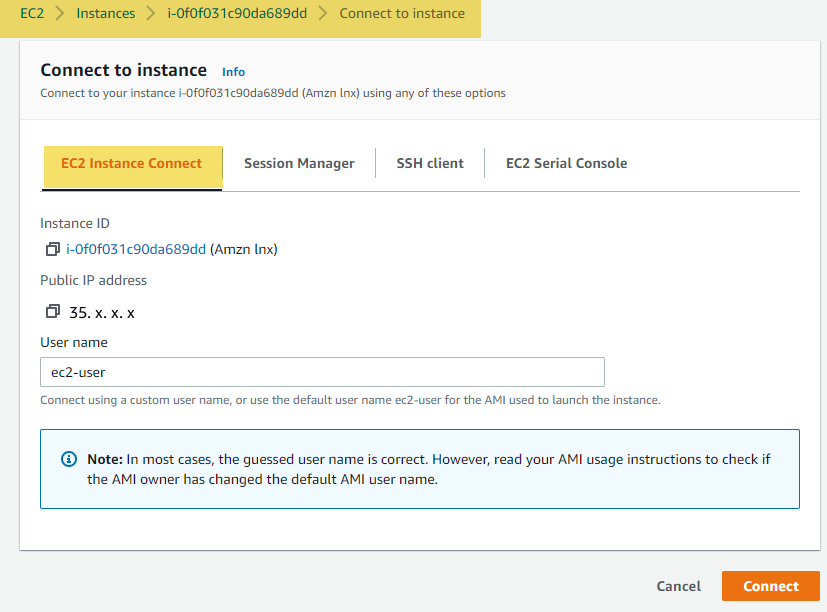

When you connect to an instance using EC2 Instance Connect, the Instance Connect API pushes a one-time-use SSH public key to the instance metadata where it remains for 60 seconds. An IAM policy attached to your IAM user authorizes your IAM user to push the public key to the instance metadata. Instance connect must be configured on every instance that supports its usage, and you need to grant permission to every IAM principal that will use Instance Connect. 

## Amazon EC2 Instance Connect requirements

Expand the one section listed below to review the connection requirements for using EC2 Instance Connect.

### Amazon EC2 Instance Connect
–
- Configure network access:

    - If your users are connecting over the internet, your instance must have a public IP address and sit in a public subnet. A public subnet has an internet gateway and a route to the internet.

    - If your users will access your instance through the instance's private IP address, then you must establish private network connectivity to your VPC, such as by using AWS Direct Connect, AWS Site-to-Site VPN, or VPC peering, so that your users can reach the instance's private IP address.
- Install EC2 Instance Connect on an instance.

    - You must configure EC2 Instance Connect on your instances unless you run Amazon Linux 2 2.0.20190618 or later or Ubuntu 20.04 or later. These newer instances come with EC2 Instance Connect preinstalled.

- Configure IAM permissions for EC2 Instance Connect.

    - For your IAM principals to connect to an instance using EC2 Instance Connect, you must grant them permission to push the public key to the instance. You grant them the permission by creating an IAM policy and attaching the policy to the IAM principals that require the permission.

## Accessing an instance using Session Manager

With AWS Systems Manager Session Manager, you can manage your Amazon EC2 instances through a browser-based shell or through the AWS CLI. You can use Session Manager to directly start a session with an instance while you're working in the EC2 Dashboard or AWS account. After the session is started, you can run bash commands as you would through any other connection type. Session Manager removes the need to open inbound ports, manage SSH keys, or use bastion hosts. You can use Session Manager with AWS PrivateLink to prevent traffic from going through the public internet. 

## Benefits of using Session Manager

Session Manager is a fully functional, straightforward to use administrative tool that offers the following benefits. Expand each of the six benefits to learn more.

### Centralized access control to managed nodes using IAM policies
–
Administrators have a single place to grant and revoke access to managed nodes. Using only IAM policies, you can control which individual users or groups in your organization can use Session Manager and which managed nodes they can access.

### No open inbound ports and no need to manage bastion hosts or SSH keys
–
Leaving inbound SSH ports and remote PowerShell ports open on your managed nodes greatly increases the risk of entities running unauthorized or malicious commands on the managed nodes. Session Manager helps you improve your security posture by letting you close these inbound ports, freeing you from managing SSH keys and certificates, bastion hosts, and jump boxes.

### One-click access to managed nodes from the console and AWS CLI
–
Using the AWS Systems Manager console or Amazon EC2 console, you can start a session with a single click. Using the AWS CLI, you can also start a session that runs a single command or a sequence of commands. Because permissions to managed nodes are provided through IAM policies instead of SSH keys or other mechanisms, the connection time is greatly reduced.

### Port forwarding
–
Redirect any port inside your managed node to a local port on a client. After that, connect to the local port and access the server application that is running inside the node.

### Cross-platform support for Windows, Linux, and macOS
–
Session Manager provides support for Windows, Linux, and macOS from a single tool. For example, you don't need to use an SSH client for Linux and macOS managed nodes or an RDP connection for Windows Server managed nodes.

### Logging and auditing session activity
–
To meet operational or security requirements in your organization, you might need to provide a record of the connections made to your managed nodes and the commands that were run on them. You can also receive notifications when a user in your organization starts or ends session activity.